# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación de datos**<a id='21'></a>

In [34]:
!pip install xgboost

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [4]:
df_train=pd.read_csv(r'C:\Users\Jaime\Desktop\Oversampling\adults_cleaned_encoded3.csv')
df_train.head()

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,2174,0,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,13,50,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,40,38,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,40,53,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Definir los datos de entrenamiento y la variable objetivo
X = df_train.drop(columns=['class_>50K'])  # DataFrame sin la columna objetivo 'class'
y = df_train['class_>50K']  # Serie con la columna objetivo 'class'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (32537, 88)
Train features shape: (26029, 88)
Train target shape: (26029,)
Test features shape: (6508, 88)
Test target shape: (6508,)


In [7]:
X

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,2174,0,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,13,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,40,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,40,53,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0,0,38,27,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32533,0,0,40,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32534,0,0,40,58,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32535,0,0,20,22,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##  **2.2. Feature Engineering**<a id='22'></a>

<Axes: xlabel='class_>50K', ylabel='count'>

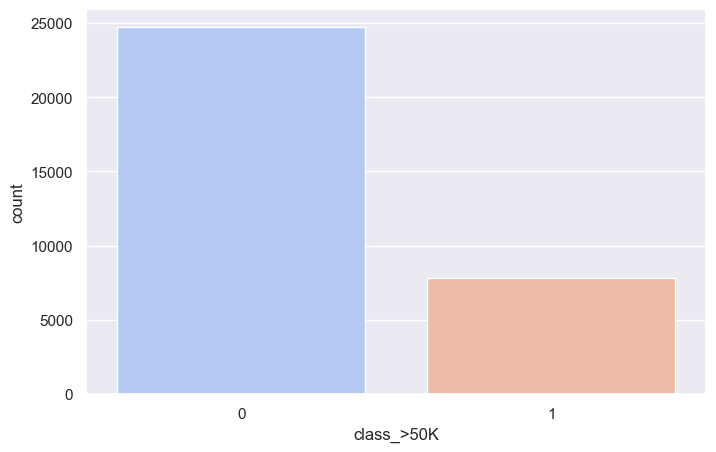

In [8]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(x=y,data=df_train,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.



En este notebook se pretende tratar los datos para mejorar los modelos que se han comprobado mejores en el notebook anterior `ML_BaselineX.ipynb`. 

Se crean dos dataset procesados:
1. Se seleccionan las variables indepedientes más influyentes mediante los métodos no supervisado de **PCA** y **RFE**.
2. Se balancean las variables utilizando el método de resampling: 
Planteamiento: balanceado aleatorio, algoritmo ROSE y algoritmo SMOTE.


    2.1. Oversampling : **SMOTE**

    2.2. Combinación de under y oversampling: **SMOTEENN**
    
    2.3. Selección del método que se considere mejor.

***Features selection:***

---

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
selector = RFE(DecisionTreeClassifier(), n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

In [11]:
selector.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [12]:
selector.ranking_

array([ 1,  1,  1,  1, 11, 71,  1, 18,  8, 17, 69, 20,  9, 23, 10,  1, 27,
        1,  3, 42,  1, 35, 19, 29, 28, 78,  1,  6, 24, 30, 15, 22, 68,  4,
       26,  7, 21, 14, 16, 37, 31, 34, 12, 25, 13, 38,  1,  5, 33, 48, 61,
       40, 65, 67, 72, 46, 63, 32, 50, 58, 62, 73, 76, 74, 59, 47, 54, 79,
       41, 45, 44, 66, 43, 77, 75, 60, 36, 55, 64, 52, 70, 39, 56, 57, 53,
        2, 51, 49])

In [13]:
 # definido y ajustado el objeto selector RFE
selected_features = X_train.columns[selector.support_]
selected_features

Index(['capital-gain', 'capital-loss', 'hours-per-week', 'age',
       'workclass_Private', 'education_Primary-school',
       'education_Secondary-school', 'marital-status_Married-civ-spouse',
       'occupation_Craft-repair', 'race_White'],
      dtype='object')

Sorprende que entre ellas esten Primary School y Secondary school

In [14]:
selector.n_features_to_select

10

In [15]:
df_fselected = df_train.loc[:,selector.get_feature_names_out()]
df_fselected['class_>50K'] = df_train['class_>50K']
#df_fselected.to_csv(os.getcwd()+'/data/processed/data_featureselected2.csv') # Guardar dataframe con features seleccionadas
df_fselected.head()

,capital-gain,capital-loss,hours-per-week,age,workclass_Private,education_Primary-school,education_Secondary-school,marital-status_Married-civ-spouse,occupation_Craft-repair,race_White,class_>50K
0,2174,0,40,39,0,0,0,0,0,1,0
1,0,0,13,50,0,0,0,1,0,1,0
2,0,0,40,38,1,0,1,0,0,1,0
3,0,0,40,53,1,0,1,1,0,0,0
4,0,0,40,28,1,0,0,1,0,0,0


Precision = True Positives / (True Positives + False Positives)
Se hace la media de cada folds para la métrica 

c:\Users\Jaime\.pyenv\pyenv-win\versions\3.10.4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jaime\.pyenv\pyenv-win\versions\3.10.4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jaime\.pyenv\pyenv-win\versions\3.10.4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jaime\.pyenv\pyenv-win\versions\3.10.4\l

Optimal number of features : 2


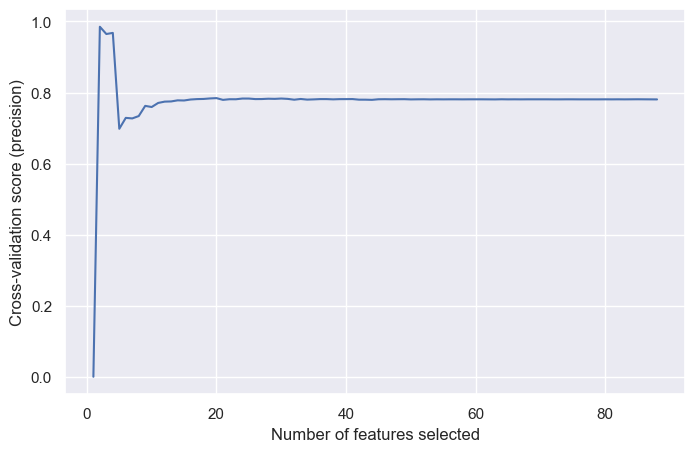

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt


gradient_boosting = GradientBoostingClassifier()

min_features_to_select = 1  # Minimum number of features to select
rfecv = RFECV(
    estimator=gradient_boosting,
    step=1,
    scoring="precision",
    min_features_to_select=min_features_to_select,
    cv=5  
)
rfecv.fit(df_train.drop(columns=['class_>50K']), df_train['class_>50K'])

print("Optimal number of features : %d" % rfecv.n_features_)


plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (precision)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_["mean_test_score"]) + min_features_to_select),
    rfecv.cv_results_["mean_test_score"]
)
plt.show()

In [17]:
 
selected_features_mask = rfecv.support_
selected_feature_names = df_train.drop(columns=['class_>50K']).columns[selected_features_mask]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['capital-gain', 'marital-status_Married-civ-spouse'], dtype='object')


Optimal number of features : 52


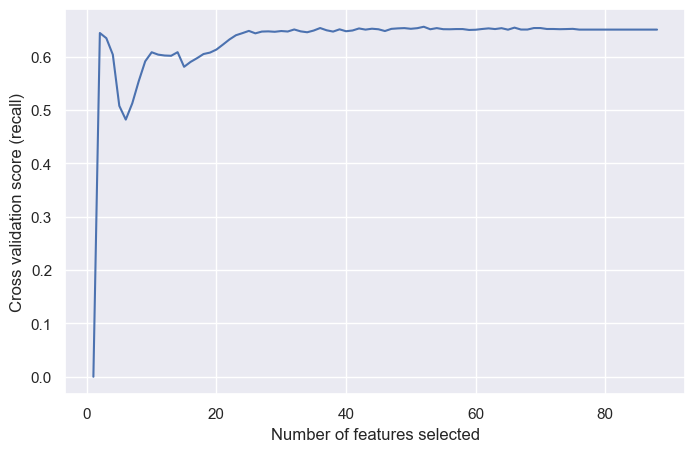

In [41]:

xgboost = XGBClassifier()

min_features_to_select = 1  # Numero minimo de features seleccionadas
rfecv = RFECV(
    estimator=xgboost,
    step=1,
    scoring="recall",
    min_features_to_select=min_features_to_select,
    cv=5  # Numero de particiones
)
rfecv.fit(df_train.drop(columns=['class_>50K']), df_train['class_>50K'])

print("Optimal number of features : %d" % rfecv.n_features_)

# Grafica recall de las particiones
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_["mean_test_score"]) + min_features_to_select),
    rfecv.cv_results_["mean_test_score"]
)
plt.show()


In [18]:

# Get the selected features
selected_features_mask = rfecv.support_
selected_feature_names = df_train.drop(columns=['class_>50K']).columns[selected_features_mask]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['capital-gain', 'marital-status_Married-civ-spouse'], dtype='object')


Es la continuación del  del Notebook anterior !! Pero lo dejo por si me vuelve a fallar la libreria esta primera parte del Balanceo, sigue el resto más abajo para la parte del Feature. aquí en vez del XGBClassifier utilizo GBoostingClassifier()

***Balancing data:***

---

*`Dataset completo (sin feature selection)`*


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

Me quedo con este 

In [22]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4905
           1       0.80      0.61      0.69      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.78      0.80      6508
weighted avg       0.86      0.87      0.86      6508



In [21]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4905
           1       0.78      0.66      0.71      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.81      6508
weighted avg       0.87      0.87      0.87      6508



Pipeline SMOTE

In [27]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1265
           1       0.55      0.60      0.57       335

    accuracy                           0.81      1600
   macro avg       0.72      0.73      0.73      1600
weighted avg       0.82      0.81      0.82      1600



*`Dataset después del feature selection (10 variables independientes)`*

In [26]:
data_FS = df_fselected.copy()

X_FS = data_FS.drop([], axis=1)

y_FS = data_FS['class_>50K'].copy()

X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y_FS, test_size = 0.2, random_state = 42)

In [27]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_FS.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_FS.shape)) 

Before OverSampling, the shape of train_X: (26029, 11)
Before OverSampling, the shape of train_y: (26029,) 



In [29]:
from imblearn.over_sampling import SMOTE

<Axes: ylabel='count'>

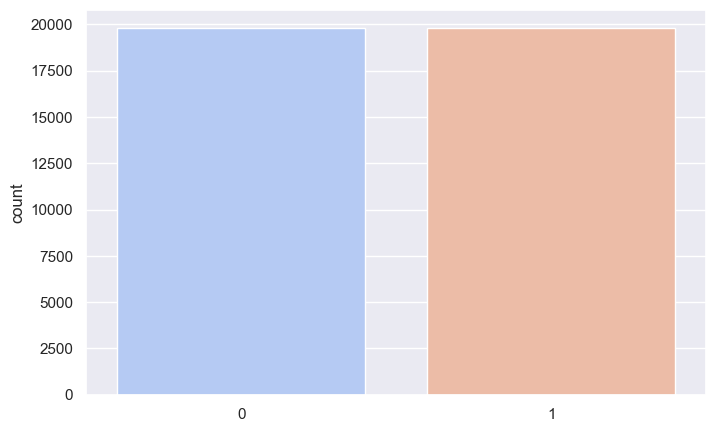

In [30]:
# Apply Oversampling
sm = SMOTE(random_state = 42) 
X_train_FSSMOTE, y_train_FSSMOTE = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

sns.countplot(x=y_train_FSSMOTE,palette='coolwarm')

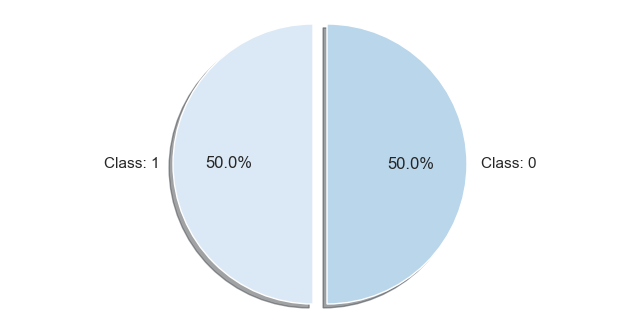

In [31]:
sns.set(rc={'figure.figsize':(8, 4)})
colors = sns.color_palette("Blues")

labels = ['Class: 1','Class: 0']
sizes =  [y_train_FSSMOTE.sum(),len(y_train_FSSMOTE)-y_train_FSSMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [34]:
# Apply Combining
sm = SMOTEENN(random_state = 42) 
X_train_FSSMOTEENN, y_train_FSSMOTEENN = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

<Axes: ylabel='count'>

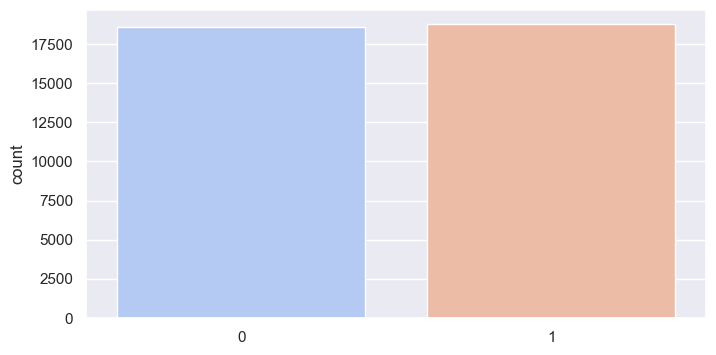

In [35]:
sns.countplot(x=y_train_FSSMOTEENN,palette='coolwarm')

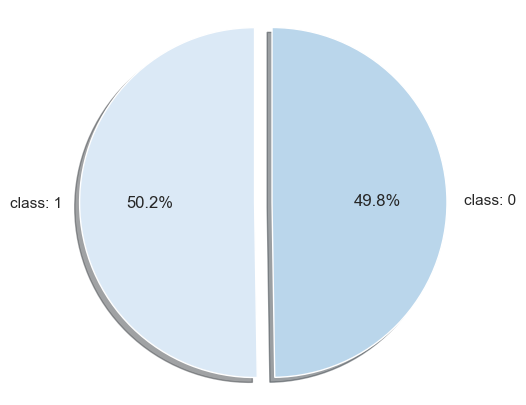

In [36]:
sns.set(rc={'figure.figsize':(5, 5)})
colors = sns.color_palette("Blues")

labels = ['class: 1','class: 0']
sizes =  [y_train_FSSMOTEENN.sum(),len(y_train_FSSMOTEENN)-y_train_FSSMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

**Observaciones:**

Se puede ver que utilizando como prueba el modelo XGBoostClassifier() las mejores métricas están entre: 

- Dataset balanceado SMOTE con feature selection: mejores métricas de modo general. 
- Dataset balanceado con SMOTE sin la feature selection: mejor recall, sin embargo disminuyen las otras métricas

**Propuesta:**

- Prueba con ajuste de hiperparámetros para confirmar los datos obtenidos de la prueba general.


<a href='3-Resultados.ipynb'>Ver siguiente notebook</a>